# Create an artifical lightcurve
In this notebook, we will make an artificial lightcurve with Gaussian noise and a Fast-rise Eponential Decay (FRED) peak. 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
def twoexp(time, theta, bkg_level=0):
    """ The function definition for a Fast-Rise Exponential-Decay (FRED) model. 

    Parameters:
    theta = list containing the peak position, amplitude, rise time 
    and skewness of the model lightcurve
    time = time series of the actual lightcurve  
    bkg_level = average level of the background noise (default: 0) 

    Returns: 
    Numpy-array of size len(self.times) with flux values. 
    """
    t0 = theta[0]
    amp = theta[1]
    scale = theta[2]
    skew = theta[3]
    
    t = (time - t0) / scale
    y = np.zeros_like(t)
    y[t <= 0] = np.exp(t[t <= 0]) 
    y[t > 0] = np.exp(-t[t > 0] / skew) 

    y = np.array(y)*amp + bkg_level

    return y

In [59]:
def create_noise(time: np.array, mu: float=0, sigma: float=0.1) -> np.array:
    """Create Gaussian noise to inject in the ligthcurve. 
    
    Parameters: 
    time = time series of the ligthcurve/number of elements you get in array noise
    mu = mean of the normal distribution/background level (default: 0)
    sigma = standard deviation of the normal distribution (default: 0.1)

    Returns: array of Gaussian noise 
    """     
    noise = np.random.normal(mu,sigma,len(time))

    return noise 

In [123]:
# Model lightcurve with values taken from first posterior sample and 
# data of "FRB20180725A_waterfall"
frb_name = "FRB20180725A"
pars_ex = np.array([-0.5, 10, 0.001, 1000])
flux_err = 0.12557502721942118
bkg_level = 0 
time = np.array([-41.77919975, -40.79615975, -39.81311976, -38.83007976,
       -37.84703977, -36.86399978, -35.88095978, -34.89791979,
       -33.91487979, -32.9318398 , -31.94879981, -30.96575981,
       -29.98271982, -28.99967982, -28.01663983, -27.03359984,
       -26.05055984, -25.06751985, -24.08447985, -23.10143986,
       -22.11839987, -21.13535987, -20.15231988, -19.16927988,
       -18.18623989, -17.2031999 , -16.2201599 , -15.23711991,
       -14.25407991, -13.27103992, -12.28799993, -11.30495993,
       -10.32191994,  -9.33887994,  -8.35583995,  -7.37279996,
        -6.38975996,  -5.40671997,  -4.42367997,  -3.44063998,
        -2.45759999,  -1.47455999,  -0.49152   ,   0.49152   ,
         1.47455999,   2.45759999,   3.44063998,   4.42367997,
         5.40671997,   6.38975996,   7.37279996,   8.35583995,
         9.33887994,  10.32191994,  11.30495993,  12.28799993,
        13.27103992,  14.25407991,  15.23711991,  16.2201599 ,
        17.2031999 ,  18.18623989,  19.16927988,  20.15231988,
        21.13535987,  22.11839987,  23.10143986,  24.08447985,
        25.06751985,  26.05055984,  27.03359984,  28.01663983,
        28.99967982,  29.98271982,  30.96575981,  31.94879981,
        32.9318398 ,  33.91487979,  34.89791979,  35.88095978,
        36.86399978,  37.84703977,  38.83007976,  39.81311976,
        40.79615975])

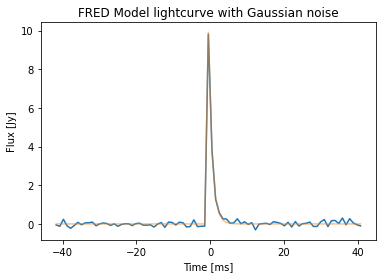

In [124]:
# Create FRED model lightcurve and Gaussian noise 
ymodel = twoexp(time, pars_ex, 0)
noise = create_noise(time=time, mu=bkg_level, sigma=flux_err)

# # Add the noise to the model ligthcurve 
lightcurve = ymodel + noise 

plt.title("FRED Model lightcurve with Gaussian noise")
plt.plot(time, lightcurve)
plt.plot(time, ymodel, alpha =0.5)
plt.xlabel("Time [ms]")
plt.ylabel("Flux [Jy]")
plt.show()

In [125]:
# Convert into .dat file with columns time, flux and flux error 
df = pd.DataFrame(time, columns=['time'])
df['flux'] = lightcurve
df['flux_err'] = flux_err  

df.to_csv(f"{frb_name}_fake2.dat", sep=" ", header=False, index=False) # this overwrites files with same name
